In [93]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [94]:
labels = {
    0: 'angry',
    1: 'fearful',
    2: 'happy',
    3: 'neutral',
    4: 'sad',
}


In [95]:
model = load_model('best_model.keras')

In [96]:
# Cargado de imagenes y guardado de predicciones
predictions = []
originals = []
images = []
examples_path = './data/real'

# Recorre los tipos de ejemplos
for filename in os.listdir(examples_path):
    # Carga de la imagen
    img_path = os.path.join(examples_path, filename)
    img = tf.keras.utils.load_img(img_path, color_mode='grayscale', target_size=(48, 48))
    
    # Se guarda la imagen en un arreglo
    images.append(img)
    
    # Se realizan transformaciones a la imagen para que pueda ser utilizada
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Normalización de la imagen
    img_array /= 255.0
    
    # Se especifican las dimensiones
    img_array = np.expand_dims(img_array, axis=0)

    # Predicción del modelo
    prediction = model.predict(img_array)
    
    # Se obtiene el índice del valor más grande en la predicción
    predicted_label = np.argmax(prediction)
    
    # Se guarda el valor de ese índice en un arreglo
    predictions.append(labels[predicted_label])
    
    # Se guarda la clase original para su comprobación
    originals.append(filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


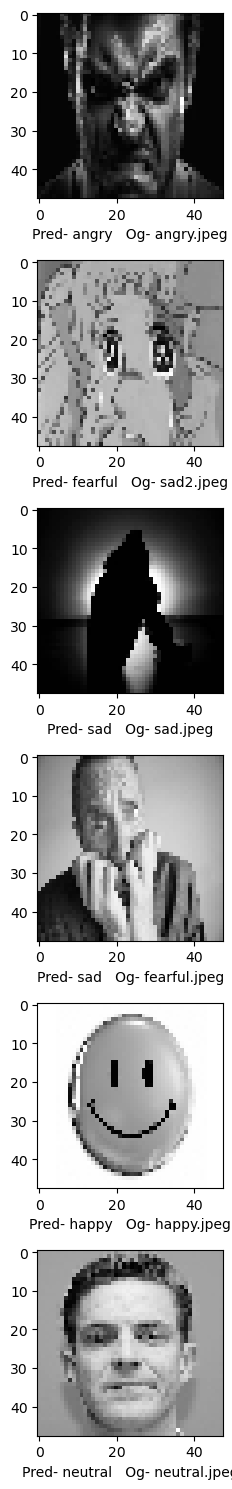

In [104]:
n = list(range(len(images)))

fig, axs = plt.subplots(len(n), 1, figsize=(15, 15))

for i in range(len(n)):
    ax = axs[i]
    ax.set_xlabel(f"Pred- {predictions[i]}   Og- {originals[i]}")
    ax.imshow(images[i], cmap='gray')
    ax.axis('on')  # Ocultar los ejes para una visualización más clara

fig.tight_layout()
plt.show()